 Traffic accidents pose a significant threat to public safety, resulting in injuries, fatalities, and economic losses. Understanding the key factors influencing accident occurrences can help in implementing effective preventive measures and improving road safety policies. This project aims to analyze traffic accident data to identify patterns and relationships between various contributing factors such as traffic density, weather conditions, and vehicle count. By leveraging machine learning models, we can develop predictive insights that assist policymakers and transportation authorities in mitigating accident risks.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
# Load the dataset
df = pd.read_csv('traffic_accidents_dict new.csv')

In [23]:
# Data Overview
print("Data Info:\n", df.info())
print("Data Head:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB
Data Info:
 None
Data Head:
    accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20               4.3

In [24]:
# Drop irrelevant columns
df = df.drop(columns=['Variable', 'Description'])

In [25]:
# Handling missing values
df = df.dropna()

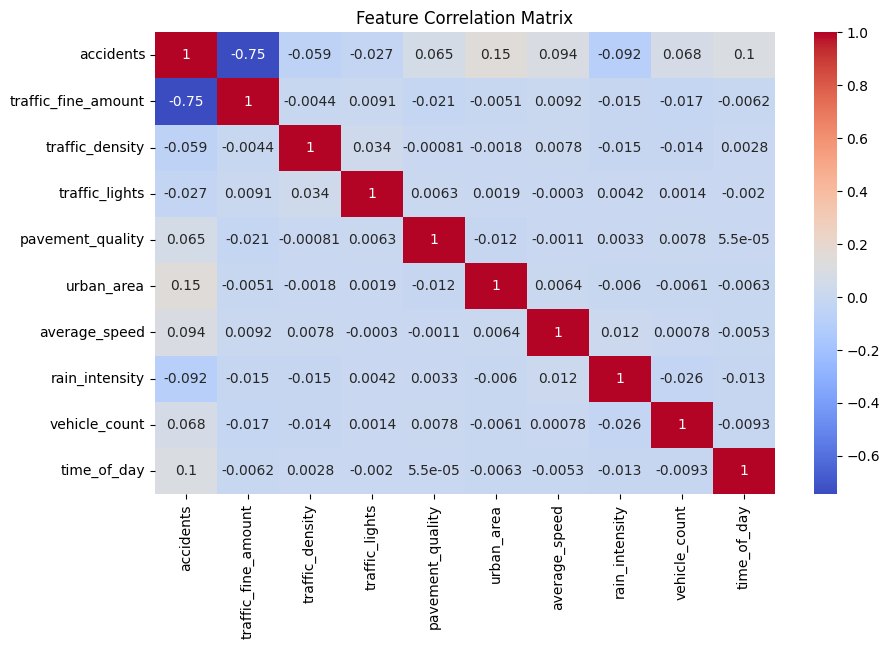

In [26]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

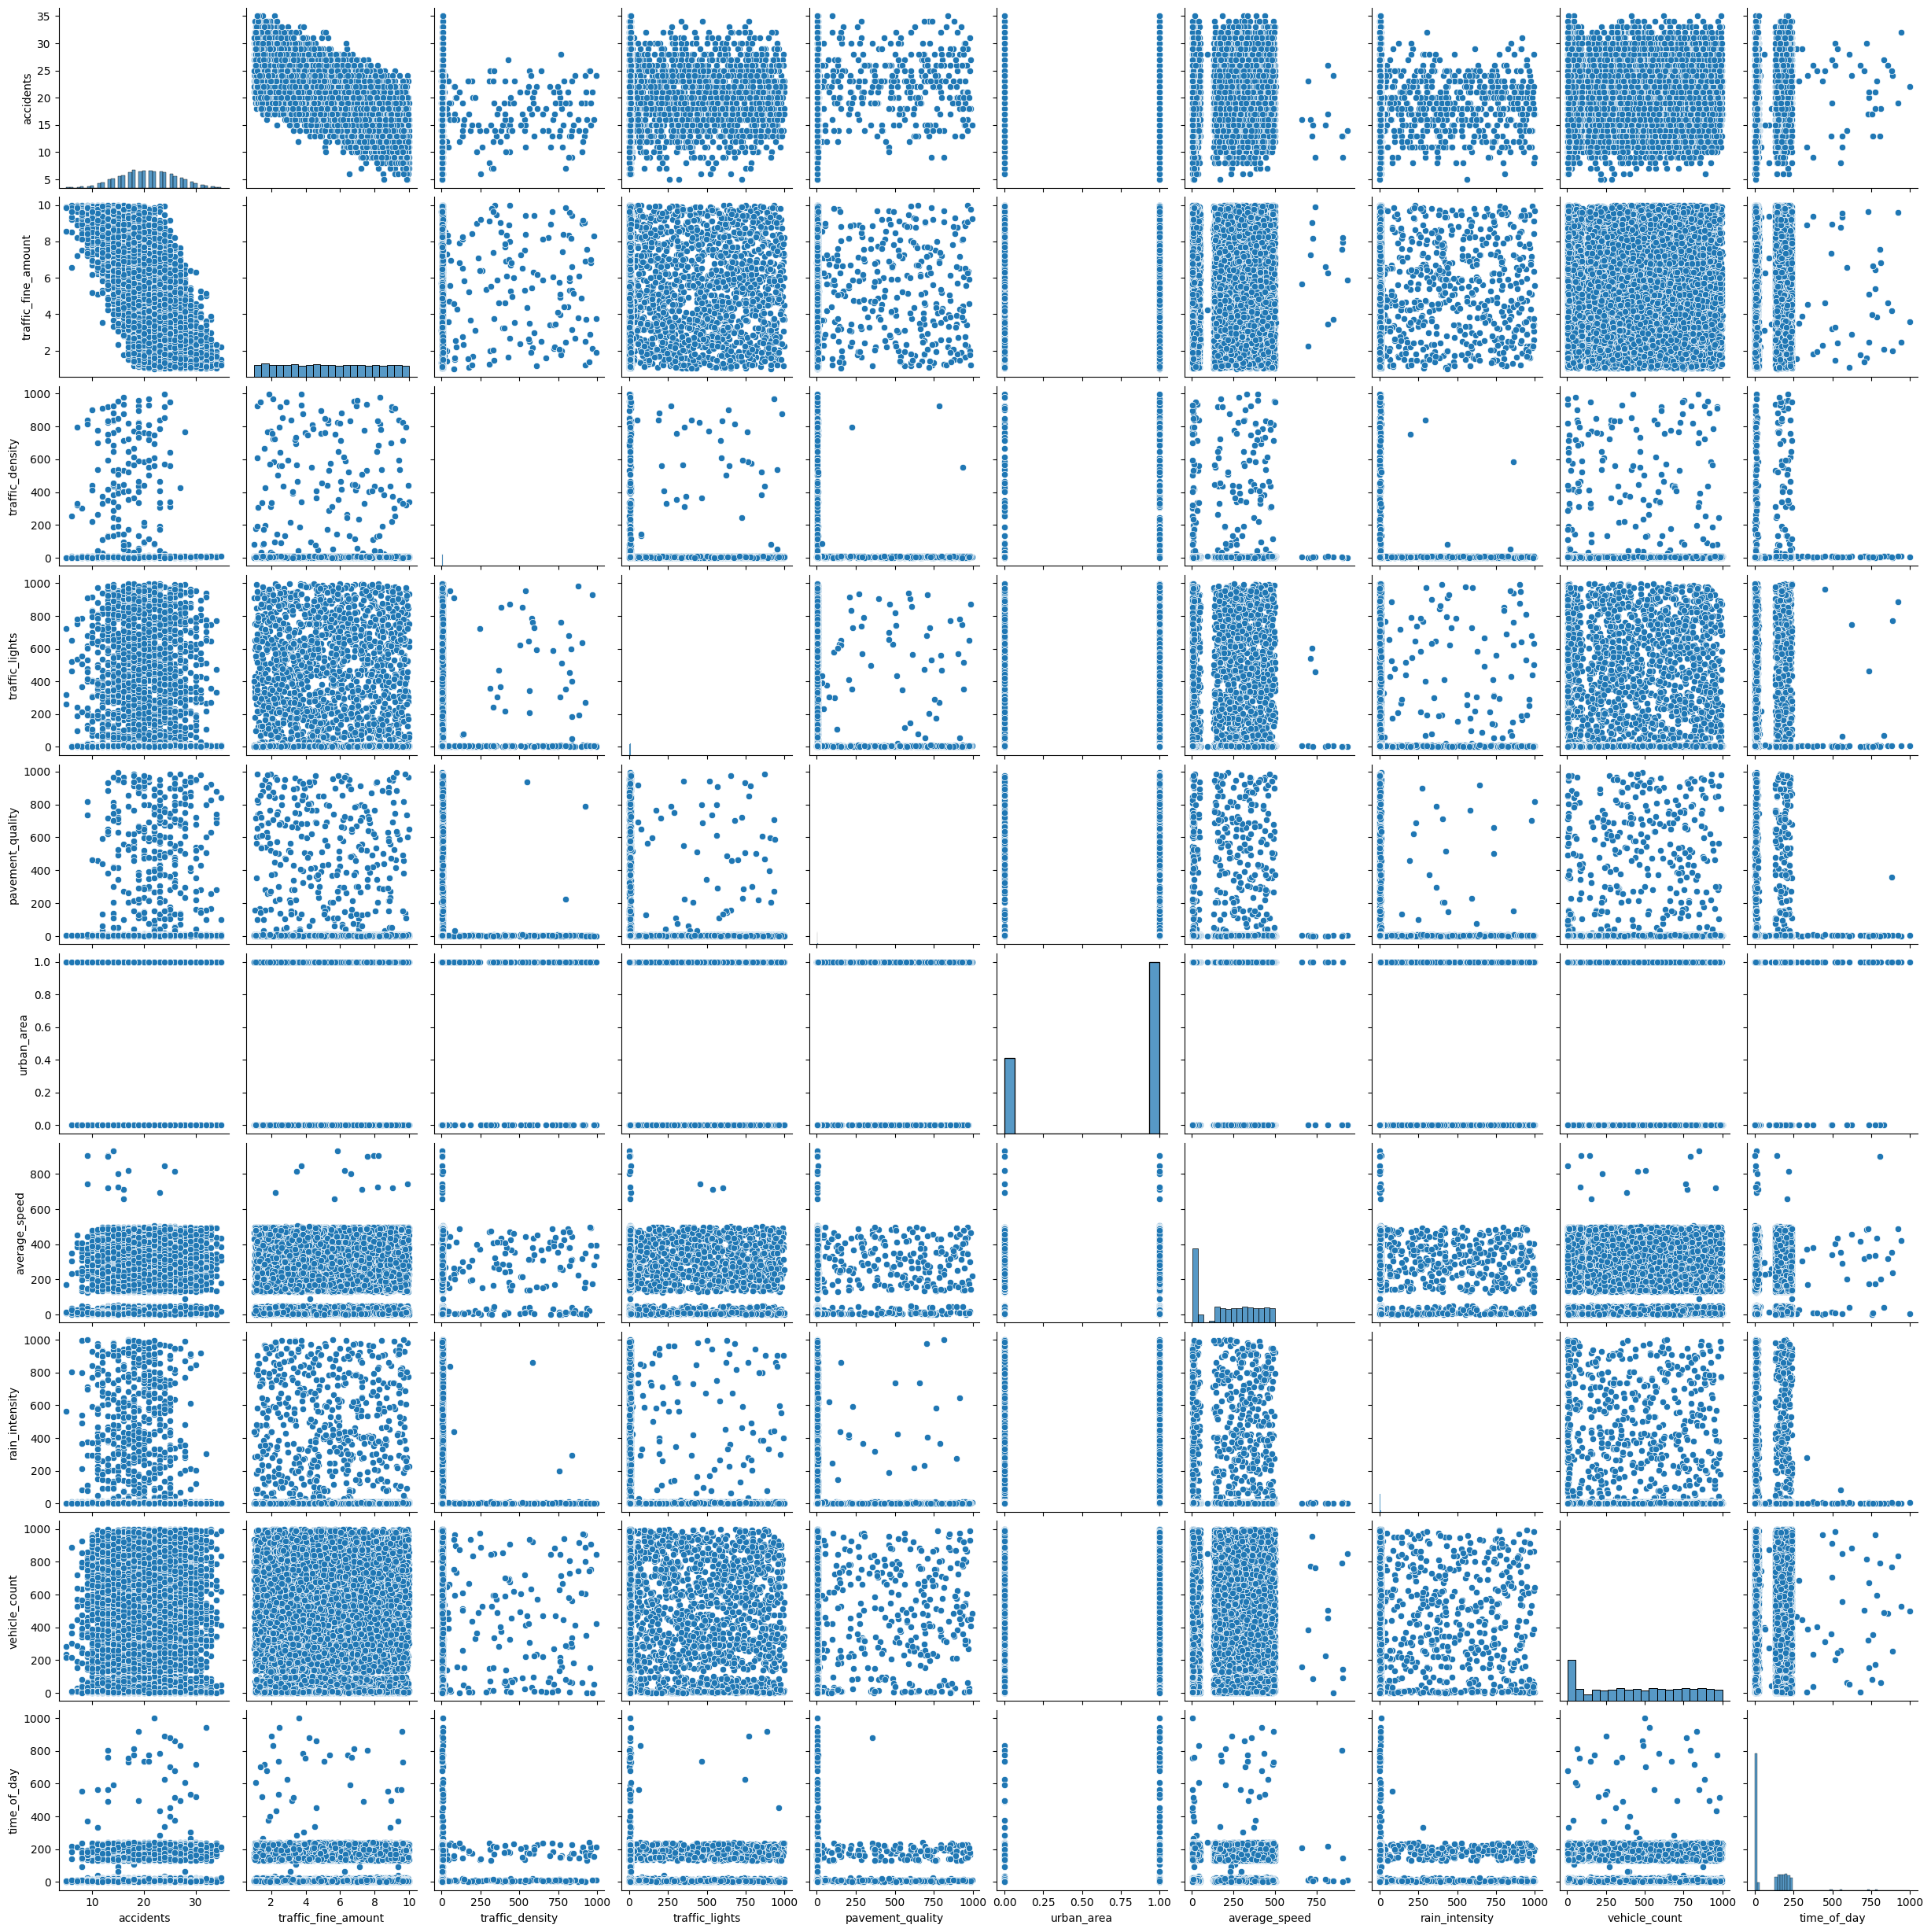

In [27]:
# Pair Plot
sns.pairplot(df)
plt.show()

In [28]:
# Splitting the dataset
X = df.drop(columns=['accidents', 'urban_area'])
y = df['accidents']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Model Training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# model evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R2 Score:", r2)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print("Cross-Validation R2 Scores:", cv_scores)
    print("Average CV R2 Score:", np.mean(cv_scores))

    # Feature importance for Random Forest
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        print("Feature Importances:", feature_importances)

    print("-" * 50)

Model: Linear Regression
Mean Squared Error (MSE): 10.879782889806133
Root Mean Squared Error (RMSE): 3.298451589732087
Mean Absolute Error (MAE): 2.6814860015413275
R2 Score: 0.598030312812829
Cross-Validation R2 Scores: [0.5958347  0.59272256 0.60107361 0.60813369 0.56881188]
Average CV R2 Score: 0.5933152890586821
--------------------------------------------------
Model: Random Forest
Mean Squared Error (MSE): 5.86187448630137
Root Mean Squared Error (RMSE): 2.4211308280019423
Mean Absolute Error (MAE): 1.8348915525114156
R2 Score: 0.7834243681648498
Cross-Validation R2 Scores: [0.79042184 0.80129708 0.79027595 0.80132293 0.7844228 ]
Average CV R2 Score: 0.7935481200868763
Feature Importances: [0.58120633 0.170405   0.02419397 0.03244334 0.03496847 0.09671997
 0.02228348 0.03777943]
--------------------------------------------------
